In [7]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as snb

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [9]:
os.listdir()

['.config', 'train.csv', '.ipynb_checkpoints', 'test.csv', 'sample_data']

In [11]:
import shutil
shutil.move('test.csv','dataset/test.csv')
shutil.move('train.csv','dataset/train.csv')

'dataset/train.csv'

In [12]:
!ls dataset

test.csv  train.csv


In [13]:
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')
print("shape of test data: ",train_data.shape)
print("shape of test data: ",test_data.shape)

shape of test data:  (14999, 9)
shape of test data:  (8764, 8)


In [14]:
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


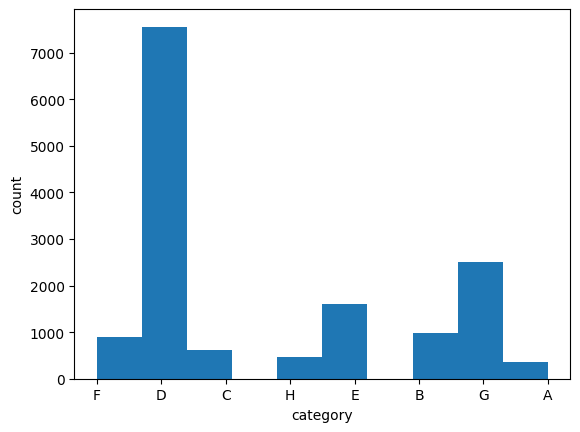

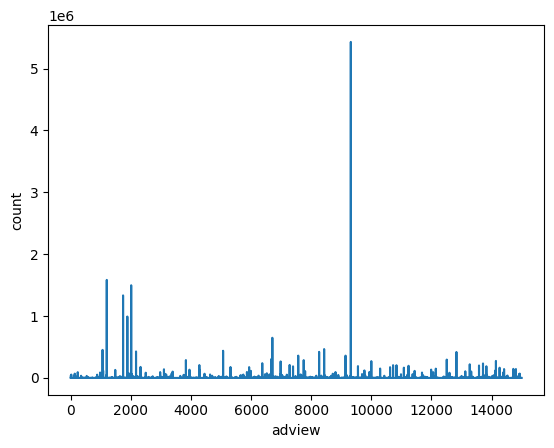

In [15]:
plt.hist(train_data['category'])
plt.xlabel('category')
plt.ylabel('count')
plt.show()
plt.plot(train_data['adview'])
plt.xlabel('adview')
plt.ylabel('count')
plt.show()

In [17]:
unique_category = train_data['category'].unique()
print(unique_category)

['F' 'D' 'C' 'H' 'E' 'B' 'G' 'A']


In [18]:
category = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
train_data['category'] = train_data['category'].map(category)
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [19]:
train_data['published'] = pd.to_datetime(train_data['published'])

train_data['Year'] = train_data['published'].dt.year
train_data['Month'] = train_data['published'].dt.month
train_data['Day'] = train_data['published'].dt.day
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category,Year,Month,Day
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6,2016,9,14
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4,2016,10,1
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3,2016,7,2
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8,2016,7,27
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4,2016,6,29


In [20]:
null_counts = train_data.isnull().sum()
print(null_counts)

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
Year         0
Month        0
Day          0
dtype: int64


In [21]:
train_data = train_data.drop('published', axis =1)
train_data.head()

,vidid,adview,views,likes,dislikes,comment,duration,category,Year,Month,Day
0,VID_18655,40,1031602,8523,363,1095,PT7M37S,6,2016,9,14
1,VID_14135,2,1707,56,2,6,PT9M30S,4,2016,10,1
2,VID_2187,1,2023,25,0,2,PT2M16S,3,2016,7,2
3,VID_23096,6,620860,777,161,153,PT4M22S,8,2016,7,27
4,VID_10175,1,666,1,0,0,PT31S,4,2016,6,29


In [22]:
# function to convert ISO 8601 duration to total seconds

def iso8601_to_seconds(duration):
    duration = duration.replace('PT', '')  # Remove 'PT' prefix
    seconds = 0
    if 'H' in duration:
        hours, duration = duration.split('H')
        seconds += int(hours) * 3600
    if 'M' in duration:
        minutes, duration = duration.split('M')
        seconds += int(minutes) * 60
    if 'S' in duration:
        seconds += int(duration.replace('S', ''))
    return seconds

train_data['duration_seconds'] = train_data['duration'].apply(iso8601_to_seconds)
train_data.head()


,vidid,adview,views,likes,dislikes,comment,duration,category,Year,Month,Day,duration_seconds
0,VID_18655,40,1031602,8523,363,1095,PT7M37S,6,2016,9,14,457
1,VID_14135,2,1707,56,2,6,PT9M30S,4,2016,10,1,570
2,VID_2187,1,2023,25,0,2,PT2M16S,3,2016,7,2,136
3,VID_23096,6,620860,777,161,153,PT4M22S,8,2016,7,27,262
4,VID_10175,1,666,1,0,0,PT31S,4,2016,6,29,31


In [23]:
train_data = train_data.drop('duration', axis =1)
train_data.head()

,vidid,adview,views,likes,dislikes,comment,category,Year,Month,Day,duration_seconds
0,VID_18655,40,1031602,8523,363,1095,6,2016,9,14,457
1,VID_14135,2,1707,56,2,6,4,2016,10,1,570
2,VID_2187,1,2023,25,0,2,3,2016,7,2,136
3,VID_23096,6,620860,777,161,153,8,2016,7,27,262
4,VID_10175,1,666,1,0,0,4,2016,6,29,31


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['video_id'] = le.fit_transform(train_data['vidid'])
train_data.head()

,vidid,adview,views,likes,dislikes,comment,category,Year,Month,Day,duration_seconds,video_id
0,VID_18655,40,1031602,8523,363,1095,6,2016,9,14,457,6078
1,VID_14135,2,1707,56,2,6,4,2016,10,1,570,2869
2,VID_2187,1,2023,25,0,2,3,2016,7,2,136,8339
3,VID_23096,6,620860,777,161,153,8,2016,7,27,262,9215
4,VID_10175,1,666,1,0,0,4,2016,6,29,31,123


In [25]:
train_data = train_data.drop('vidid', axis =1)
train_data.head()

,adview,views,likes,dislikes,comment,category,Year,Month,Day,duration_seconds,video_id
0,40,1031602,8523,363,1095,6,2016,9,14,457,6078
1,2,1707,56,2,6,4,2016,10,1,570,2869
2,1,2023,25,0,2,3,2016,7,2,136,8339
3,6,620860,777,161,153,8,2016,7,27,262,9215
4,1,666,1,0,0,4,2016,6,29,31,123


In [26]:
# Removing character "F" present in data
train_data=train_data[train_data.views!='F']
train_data=train_data[train_data.likes!='F']
train_data=train_data[train_data.dislikes!='F']
train_data=train_data[train_data.comment!='F']

In [27]:
X = train_data.drop('adview', axis =1)
y = train_data['adview']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train , X_val , y_train , y_val = train_test_split(X_scaled , y , test_size = 0.2 , random_state = 42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (11709, 10)
Validation set shape: (2928, 10)


In [28]:
def print_error(X_val, y_val, model_name):
    y_pred = model_name.predict(X_val)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_val,y_pred ))
    print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_val, y_pred)))


Linear Regression

---



In [29]:
from sklearn import metrics
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_val,y_val, linear_regression)

Mean Absolute Error: 5363.403798114675
Mean Squared Error: 10872661786.43471
Root Mean Squared Error:  104272.05659444293


Support Vector Regression

---

In [30]:
svr = SVR()
svr.fit(X_train, y_train)
print_error(X_val,y_val, svr)

Mean Absolute Error: 3477.9137470033934
Mean Squared Error: 10901283433.51221
Root Mean Squared Error:  104409.21143995012


Decision Tree Regressor

---

In [31]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_val,y_val, decision_tree)

Mean Absolute Error: 4591.341530054645
Mean Squared Error: 11807115527.625
Root Mean Squared Error:  108660.55184667985


Random Forest Regressor

---

In [32]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
print_error(X_val,y_val, random_forest)

Mean Absolute Error: 4654.36368510929
Mean Squared Error: 10137324313.067493
Root Mean Squared Error:  100684.28036723257


Neural Network

---

In [33]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


In [34]:
from keras_tuner import HyperModel

class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dense(1))

        model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                      loss= 'mse')
        return model

hypermodel = MyHyperModel()

In [35]:
!mkdir tuned_model

In [36]:
!ls

dataset  sample_data  tuned_model


In [37]:
from keras_tuner import RandomSearch

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='tuned_model',
    project_name='Artificial_Neural_Network'
)


In [38]:
tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Trial 10 Complete [00h 02m 28s]
val_loss: 10768264704.0

Best val_loss So Far: 10291922432.0
Total elapsed time: 00h 30m 22s


In [44]:
best_model = tuner.get_best_models(num_models=1)[0]

In [45]:
y_pred = best_model.predict(X_val)
print("Best model MSE:", mean_squared_error(y_val, y_pred))

92/92 [==============================] - 0s 1ms/step
Best model MSE: 10289753945.235624


In [46]:
print_error(X_val,y_val, best_model)

92/92 [==============================] - 0s 1ms/step
Mean Absolute Error: 4273.584176733276
Mean Squared Error: 10289753945.235624
Root Mean Squared Error:  101438.42440237143


In [47]:
print(best_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 416)               4576      
                                                                 
 dense_1 (Dense)             (None, 192)               80064     
                                                                 
 dense_2 (Dense)             (None, 1)                 193       
                                                                 
Total params: 84833 (331.38 KB)
Trainable params: 84833 (331.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Saving Scikit-Learn models


In [48]:
import joblib
joblib.dump(linear_regression, 'linear_regression.pkl')
joblib.dump(svr, 'svr.pkl')
joblib.dump(decision_tree, 'decision_tree.pkl')
joblib.dump(random_forest, 'random_forest.pkl')

['random_forest.pkl']

In [49]:
os.listdir()

['.config',
 'dataset',
 'svr.pkl',
 'decision_tree.pkl',
 'tuned_model',
 '.ipynb_checkpoints',
 'random_forest.pkl',
 'linear_regression.pkl',
 'sample_data']

# Saving Keras Artificial Neural Network




In [55]:
best_model.save('artificial_neural_network.keras')

# Testing

In [52]:
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [64]:
from keras.models import load_model
# Load the saved model
loaded_model = load_model('artificial_neural_network.keras')

# Recompile the loaded model with the optimizer
loaded_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [56]:
test_data=test_data[test_data.views!='F']
test_data=test_data[test_data.likes!='F']
test_data=test_data[test_data.dislikes!='F']
test_data=test_data[test_data.comment!='F']

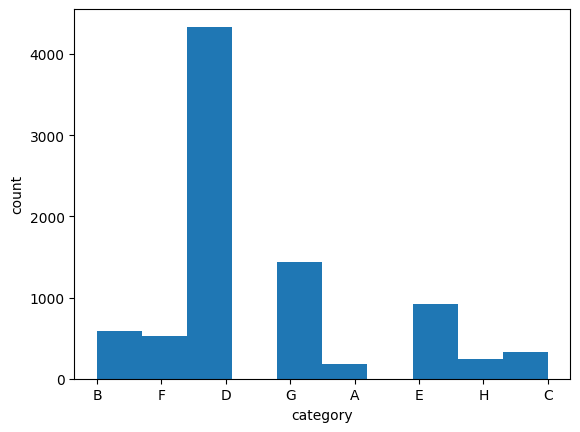

In [58]:
plt.hist(test_data['category'])
plt.xlabel('category')
plt.ylabel('count')
plt.show()



In [59]:
test_data['published'] = pd.to_datetime(test_data['published'])

test_data['Year'] = test_data['published'].dt.year
test_data['Month'] = test_data['published'].dt.month
test_data['Day'] = test_data['published'].dt.day
test_data = test_data.drop('published', axis =1)


In [60]:
test_data['duration_seconds'] = test_data['duration'].apply(iso8601_to_seconds)
test_data = test_data.drop('duration', axis =1)


In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_data['video_id'] = le.fit_transform(test_data['vidid'])
test_data = test_data.drop('vidid', axis =1)
test_data.head()

,views,likes,dislikes,comment,category,Year,Month,Day,duration_seconds,video_id
0,440238,6153,218,1377,B,2017,2,18,449,231
1,1040132,8171,340,1047,F,2016,6,28,389,3444
2,28534,31,11,1,D,2014,3,10,2274,1593
3,1316715,2284,250,274,G,2010,6,5,595,3775
4,1893173,2519,225,116,B,2016,9,3,188,7644


In [63]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
test_data["category"]=test_data["category"].map(category)
test_data.head()

,views,likes,dislikes,comment,category,Year,Month,Day,duration_seconds,video_id
0,440238,6153,218,1377,2,2017,2,18,449,231
1,1040132,8171,340,1047,6,2016,6,28,389,3444
2,28534,31,11,1,4,2014,3,10,2274,1593
3,1316715,2284,250,274,7,2010,6,5,595,3775
4,1893173,2519,225,116,2,2016,9,3,188,7644


In [66]:
X_test = scaler.transform(test_data)

In [67]:
Prediction = loaded_model.predict(X_test)
print("Test set predictions:", Prediction)

268/268 [==============================] - 0s 1ms/step
Test set predictions: [[  508.83817]
 [  770.00116]
 [-1576.6096 ]
 ...
 [ -891.1009 ]
 [  537.0711 ]
 [ 5704.5054 ]]


In [68]:
Prediction = pd.DataFrame(Prediction)
Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [70]:
Prediction = Prediction.rename(columns={0: "Adview"})

In [71]:
Prediction.head()

,Adview
0,508.838165
1,770.001160
2,-1576.609619
3,30.763702
4,188759.234375


In [73]:
Prediction.to_csv("predictedAdview.csv")